## Gradient Bandit Algorithm

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
class Gradient_Bandit:
    def __init__(self, lrt, mus, stds= None, n_iters =1, alpha = 0.01, eps =0, baseline = None):

        self.n_arms = len(mus)
        self.mus = np.array(mus)
        self.eps = eps
        
        if stds is None:
            self.stds = np.ones_like(self.mus)
        else:
            self.stds = np.array(stds)
                        
        self.H = np.zeros(self.n_arms) 
        self.Q = np.zeros(self.n_arms) # value functions
        self.counter = np.zeros(self.n_arms)
                
        self.optimum_actions_percentage = np.zeros(n_iters)
        self.bestaction = np.where(self.mus >= np.max(self.mus - 1e-12))[0].tolist()

                        
        reward = 0
        sum_reward = 0
        n_best_action = 0
        self.Mean_Rewards = []
        self.Rewards = []
                
        for i in range(n_iters):
            
            self.pi = soft_max(self.H)
            idx = self.Policy()
            if idx in self.bestaction:
                n_best_action += 1
            self.optimum_actions_percentage[i] = n_best_action/(i+1)            
                
            reward = self.Step_Reward(idx)
            sum_reward += reward
            self.Mean_Rewards.append(sum_reward/(i+1))
            self.Rewards.append(reward)
            
            
            self.update_Q(reward, lrt, idx)
            self.update_H(reward, idx, self.pi.copy(), alpha, sum_reward/(i+1),baseline)
                               
###############################################################################
    
    def Step_Reward(self, arm_number):      
        return np.random.normal(loc = self.mus[arm_number], scale = self.stds[arm_number])                
    
    def Policy(self):        
              
        if np.random.rand() <= self.eps:
            idx = np.random.randint(0,self.n_arms)
        else:
            idx = np.random.choice(
                np.where(self.pi >= np.max(self.pi))[0])
                
        #idx = np.random.choice(np.where(self.pi >= np.max(self.pi))[0])            
        self.counter[idx] += 1
                        
        return idx 
    
    
    def update_Q(self, reward, lrt, idx):
        
        if isinstance(lrt , float):
            self.Q[idx] = self.Q[idx] + lrt * (reward - self.Q[idx])
        else: 
            self.Q[idx] = self.Q[idx] + lrt(self.counter[idx]) * (reward - self.Q[idx])        
                     
    
    
    def update_H(self, reward, idx, pi, alpha, mean_reward, baseline):
        
        temp = np.zeros_like(self.mus)
        temp[idx] = 1  
        
        if baseline is None:        
            self.H += alpha * (reward - self.Q.max()) * (temp - pi)   
        else:
            self.H += alpha * (reward - baseline) * (temp - pi)
        
        #self.H += alpha * (reward - self.Q[idx]) * (temp + pi)
        #self.H += alpha * (reward - mean_reward) * (temp + pi)
        #self.H += alpha * (reward - 8) * (temp + pi)

            


def soft_max(x):
    z = x - max(x)
    numerator = np.exp(z)
    denominator = np.sum(numerator)
    softmax = numerator/denominator
    return softmax


def lrt(n):
    return 1/n

def preference(p):
    a = np.random.uniform()    
    Sum = p[0]
    for i in range(len(p)):
        if a <= Sum - 1e-12:
            return i
        else:
            Sum += p[i+1]            

In [3]:
model = Gradient_Bandit(lrt = 0.1, mus= [3, 4, 15, 5, -2, -8, 0], n_iters=30000, 
                        alpha = 0.02, eps = 0.01)

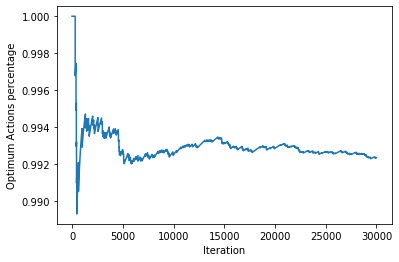

In [4]:
plt.plot(model.optimum_actions_percentage)
plt.xlabel('Iteration')
plt.ylabel('Optimum Actions percentage')
#plt.title('Rewards-Iteration history')
plt.show()

In [5]:
model.pi.argmax()

2

In [6]:
n_iter = 1000
n_episodes = 200

Average_Mean_Rewards_history_1 = np.zeros(n_iter)
Average_Mean_Rewards_history_2 = np.zeros(n_iter)
Average_Mean_Rewards_history_3 = np.zeros(n_iter)


Average_Rewards_history_1 = np.zeros(n_iter)
Average_Rewards_history_2 = np.zeros(n_iter)
Average_Rewards_history_3 = np.zeros(n_iter)


Bestaction_history_1 = np.zeros(n_iter)
Bestaction_history_2 = np.zeros(n_iter)
Bestaction_history_3 = np.zeros(n_iter)


for i in range(n_episodes):
    
    mus = np.random.normal(loc = 0.0, scale = 4.0, size = 10)    
    
    model = Gradient_Bandit(lrt = lrt, mus = mus, n_iters=n_iter, alpha = 0.05, eps = 0.05)
    Average_Mean_Rewards_history_1 += model.Mean_Rewards
    Average_Rewards_history_1 += model.Rewards
    Bestaction_history_1 += model.optimum_actions_percentage

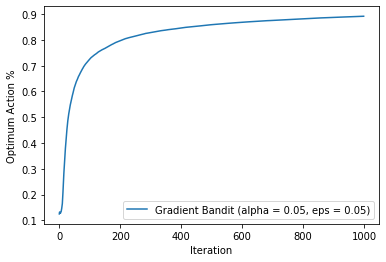

In [7]:
plt.plot(Bestaction_history_1/200, label = "Gradient Bandit (alpha = 0.05, eps = 0.05)")
plt.xlabel('Iteration')
plt.ylabel('Optimum Action %')
#plt.title('Average Mean_Rewards-Iteration history in 400 * 2000-rounds')
plt.legend()
plt.show()

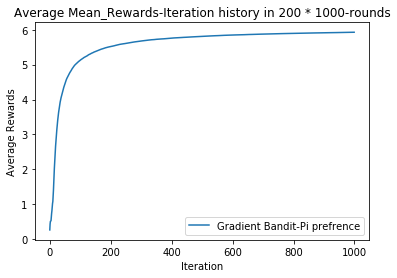

In [8]:
plt.plot(Average_Mean_Rewards_history_1/200, label = "Gradient Bandit-Pi prefrence")
plt.xlabel('Iteration')
plt.ylabel('Average Rewards')
plt.title('Average Mean_Rewards-Iteration history in 200 * 1000-rounds')
plt.legend()
plt.show()

In [9]:
mus.argmax()

5

In [10]:
model.pi.argmax()

5

## Gradient Bandit Using pi Preferences

In [11]:
class Gradient_Bandit1(Gradient_Bandit):
    def __init__(self, lrt, mus, stds= None, n_iters =1, alpha = 0.1, eps =0, baseline = None):
        super().__init__(lrt, mus, stds, n_iters, alpha, eps, baseline)
        
    def Policy(self): 
        #idx = self.pi.argmax()
        idx = preference(self.pi.copy())
        return idx

In [12]:
model = Gradient_Bandit1(lrt = 0.1, mus= [3, 4, 8, 5, -2, -8, 0], n_iters=1000, alpha = 0.1)

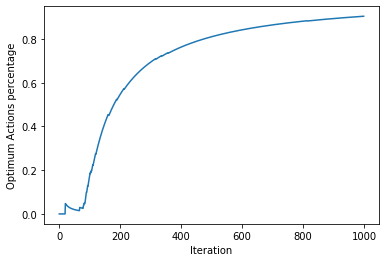

In [13]:
plt.plot(model.optimum_actions_percentage)
plt.xlabel('Iteration')
plt.ylabel('Optimum Actions percentage')
#plt.title('Rewards-Iteration history')
plt.show()

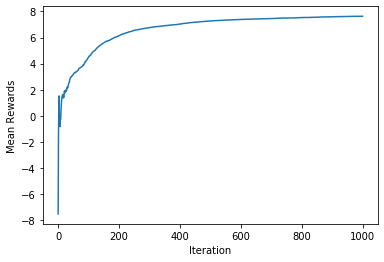

In [14]:
plt.plot(model.Mean_Rewards)
plt.xlabel('Iteration')
plt.ylabel('Mean Rewards')
#plt.title('Rewards-Iteration history')
plt.show()

In [15]:
model.Mean_Rewards[-1]

7.631088164037027

In [16]:
model.Q.argmax()

2

In [17]:
model.pi

array([5.71258855e-04, 2.41888799e-04, 9.98020113e-01, 5.64986450e-04,
       1.52242465e-04, 1.79821033e-04, 2.69689329e-04])

In [18]:
n_iters = 3000
n_episodes = 200

Average_Mean_Rewards_history_1 = np.zeros(n_iters)
Average_Mean_Rewards_history_2 = np.zeros(n_iters)
Average_Mean_Rewards_history_3 = np.zeros(n_iters)

Average_Rewards_history_1 = np.zeros(n_iters)
Average_Rewards_history_2 = np.zeros(n_iters)
Average_Rewards_history_3 = np.zeros(n_iters)

Bestaction_history_1 = np.zeros(n_iters)
Bestaction_history_2 = np.zeros(n_iters)
Bestaction_history_3 = np.zeros(n_iters)


Average_Mean_Rewards_history_4 = np.zeros(n_iters)
Average_Mean_Rewards_history_5 = np.zeros(n_iters)
Average_Mean_Rewards_history_6 = np.zeros(n_iters)

Average_Rewards_history_4 = np.zeros(n_iters)
Average_Rewards_history_5 = np.zeros(n_iters)
Average_Rewards_history_6 = np.zeros(n_iters)

Bestaction_history_4 = np.zeros(n_iters)
Bestaction_history_5 = np.zeros(n_iters)
Bestaction_history_6 = np.zeros(n_iters)


for i in range(n_episodes):
    
    mus = np.random.normal(loc = 0.0, scale = 10.0, size = 10)
    
    model = Gradient_Bandit1(lrt = .1, mus = mus, n_iters = n_iters, alpha = 0.01)
    Average_Mean_Rewards_history_1 += model.Mean_Rewards
    Average_Rewards_history_1 += model.Rewards
    Bestaction_history_1 += model.optimum_actions_percentage
    
    model = Gradient_Bandit1(lrt = .1, mus = mus, n_iters = n_iters, alpha = 0.05)
    Average_Mean_Rewards_history_2 += model.Mean_Rewards
    Average_Rewards_history_2 += model.Rewards
    Bestaction_history_2 += model.optimum_actions_percentage
        
    model = Gradient_Bandit1(lrt = .1, mus = mus, n_iters = n_iters, alpha = 0.2)
    Average_Mean_Rewards_history_3 += model.Mean_Rewards
    Average_Rewards_history_3 += model.Rewards
    Bestaction_history_3 += model.optimum_actions_percentage
    
    model = Gradient_Bandit1(lrt = .1, mus = mus, n_iters = n_iters, alpha = 0.01, baseline = 0)
    Average_Mean_Rewards_history_4 += model.Mean_Rewards
    Average_Rewards_history_4 += model.Rewards
    Bestaction_history_4 += model.optimum_actions_percentage
    
    model = Gradient_Bandit1(lrt = .1, mus = mus, n_iters = n_iters, alpha = 0.05, baseline = 0)
    Average_Mean_Rewards_history_5 += model.Mean_Rewards
    Average_Rewards_history_5 += model.Rewards
    Bestaction_history_5 += model.optimum_actions_percentage
        
    model = Gradient_Bandit1(lrt = .1, mus = mus, n_iters = n_iters, alpha = 0.2, baseline = 0)
    Average_Mean_Rewards_history_6 += model.Mean_Rewards
    Average_Rewards_history_6 += model.Rewards
    Bestaction_history_6 += model.optimum_actions_percentage

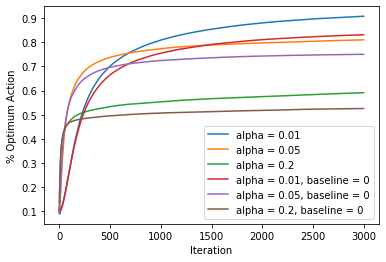

In [19]:
plt.plot(Bestaction_history_1/200, label = "alpha = 0.01")
plt.plot(Bestaction_history_2/200, label = "alpha = 0.05")
plt.plot(Bestaction_history_3/200, label = "alpha = 0.2")

plt.plot(Bestaction_history_4/200, label = "alpha = 0.01, baseline = 0")
plt.plot(Bestaction_history_5/200, label = "alpha = 0.05, baseline = 0")
plt.plot(Bestaction_history_6/200, label = "alpha = 0.2, baseline = 0")

plt.xlabel('Iteration')
plt.ylabel('% Optimum Action')
#plt.title('Average Mean_Rewards-Iteration history in 400 * 2000-rounds')
plt.legend()
plt.show()

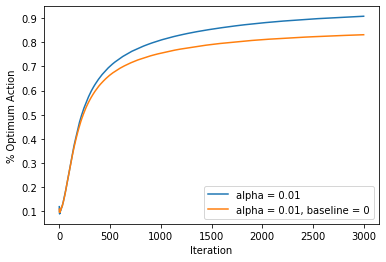

In [20]:
plt.plot(Bestaction_history_1/200, label = "alpha = 0.01")

plt.plot(Bestaction_history_4/200, label = "alpha = 0.01, baseline = 0")

plt.xlabel('Iteration')
plt.ylabel('% Optimum Action')
#plt.title('Average Mean_Rewards-Iteration history in 400 * 2000-rounds')
plt.legend()
plt.show()

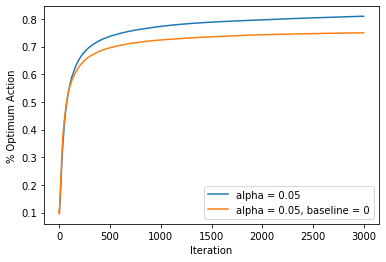

In [21]:

plt.plot(Bestaction_history_2/200, label = "alpha = 0.05")

plt.plot(Bestaction_history_5/200, label = "alpha = 0.05, baseline = 0")

plt.xlabel('Iteration')
plt.ylabel('% Optimum Action')
#plt.title('Average Mean_Rewards-Iteration history in 400 * 2000-rounds')
plt.legend()
plt.show()

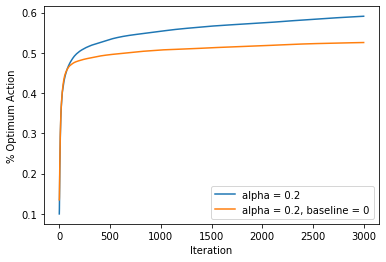

In [22]:

plt.plot(Bestaction_history_3/200, label = "alpha = 0.2")

plt.plot(Bestaction_history_6/200, label = "alpha = 0.2, baseline = 0")

plt.xlabel('Iteration')
plt.ylabel('% Optimum Action')
#plt.title('Average Mean_Rewards-Iteration history in 400 * 2000-rounds')
plt.legend()
plt.show()

# Nonstationarity Case
Each mean of distributions will be updated by independently adding a normally distributed increment with mean zero and standard deviation $0.1$.

In [23]:
class Gradient_Bandit_Nonstationarity(Gradient_Bandit1):
    def __init__(self, lrt, mus, stds= None, n_iters =1, alpha = 0.1, eps =0, baseline = None):
        super().__init__(lrt, mus, stds, n_iters, alpha, eps, baseline)
        
    def Step_Reward(self, arm_number):      
        rew = np.random.normal(loc = self.mus[arm_number], scale = self.stds[arm_number])
        self.mus += np.random.normal(loc = 0, scale = 0.1, size = self.n_arms)
        return rew

In [24]:
model = Gradient_Bandit_Nonstationarity(lrt = 0.1, mus= [3., 4., 8., 5., -2., -8., 0.], n_iters=1000, alpha = 0.1)

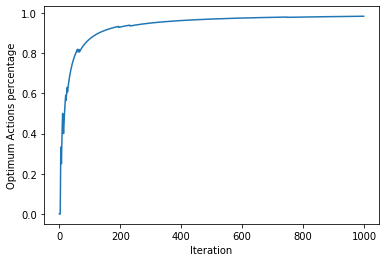

In [25]:
plt.plot(model.optimum_actions_percentage)
plt.xlabel('Iteration')
plt.ylabel('Optimum Actions percentage')
#plt.title('Rewards-Iteration history')
plt.show()

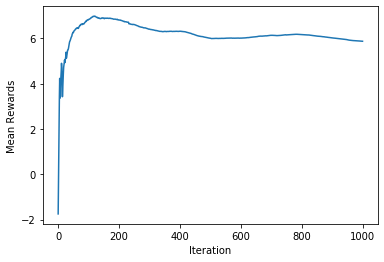

In [26]:
plt.plot(model.Mean_Rewards)
plt.xlabel('Iteration')
plt.ylabel('Mean Rewards')
#plt.title('Rewards-Iteration history')
plt.show()

In [27]:
print(model.Q.argmax())
print(model.pi)

2
[2.17290756e-04 1.16005075e-04 9.99232221e-01 2.68797165e-04
 4.23776576e-05 1.73939046e-05 1.05914453e-04]


In [28]:
n_iters = 3000
n_episodes = 200

Average_Mean_Rewards_history_1 = np.zeros(n_iters)
Average_Mean_Rewards_history_2 = np.zeros(n_iters)
Average_Mean_Rewards_history_3 = np.zeros(n_iters)

Average_Rewards_history_1 = np.zeros(n_iters)
Average_Rewards_history_2 = np.zeros(n_iters)
Average_Rewards_history_3 = np.zeros(n_iters)

Bestaction_history_1 = np.zeros(n_iters)
Bestaction_history_2 = np.zeros(n_iters)
Bestaction_history_3 = np.zeros(n_iters)


Average_Mean_Rewards_history_4 = np.zeros(n_iters)
Average_Mean_Rewards_history_5 = np.zeros(n_iters)
Average_Mean_Rewards_history_6 = np.zeros(n_iters)

Average_Rewards_history_4 = np.zeros(n_iters)
Average_Rewards_history_5 = np.zeros(n_iters)
Average_Rewards_history_6 = np.zeros(n_iters)

Bestaction_history_4 = np.zeros(n_iters)
Bestaction_history_5 = np.zeros(n_iters)
Bestaction_history_6 = np.zeros(n_iters)


for i in range(n_episodes):
    
    mus = np.random.normal(loc = 0.0, scale = 10.0, size = 10)
    
    model = Gradient_Bandit_Nonstationarity(lrt = .1, mus = mus, n_iters = n_iters, alpha = 0.01)
    Average_Mean_Rewards_history_1 += model.Mean_Rewards
    Average_Rewards_history_1 += model.Rewards
    Bestaction_history_1 += model.optimum_actions_percentage
    
    model = Gradient_Bandit_Nonstationarity(lrt = .1, mus = mus, n_iters = n_iters, alpha = 0.05)
    Average_Mean_Rewards_history_2 += model.Mean_Rewards
    Average_Rewards_history_2 += model.Rewards
    Bestaction_history_2 += model.optimum_actions_percentage
        
    model = Gradient_Bandit_Nonstationarity(lrt = .1, mus = mus, n_iters = n_iters, alpha = 0.2)
    Average_Mean_Rewards_history_3 += model.Mean_Rewards
    Average_Rewards_history_3 += model.Rewards
    Bestaction_history_3 += model.optimum_actions_percentage
    
    model = Gradient_Bandit_Nonstationarity(lrt = .1, mus = mus, n_iters = n_iters, alpha = 0.01, baseline = 0)
    Average_Mean_Rewards_history_4 += model.Mean_Rewards
    Average_Rewards_history_4 += model.Rewards
    Bestaction_history_4 += model.optimum_actions_percentage
    
    model = Gradient_Bandit_Nonstationarity(lrt = .1, mus = mus, n_iters = n_iters, alpha = 0.05, baseline = 0)
    Average_Mean_Rewards_history_5 += model.Mean_Rewards
    Average_Rewards_history_5 += model.Rewards
    Bestaction_history_5 += model.optimum_actions_percentage
        
    model = Gradient_Bandit_Nonstationarity(lrt = .1, mus = mus, n_iters = n_iters, alpha = 0.2, baseline = 0)
    Average_Mean_Rewards_history_6 += model.Mean_Rewards
    Average_Rewards_history_6 += model.Rewards
    Bestaction_history_6 += model.optimum_actions_percentage

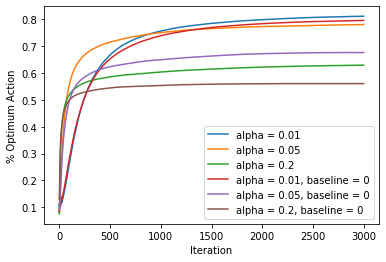

In [29]:
plt.plot(Bestaction_history_1/200, label = "alpha = 0.01")
plt.plot(Bestaction_history_2/200, label = "alpha = 0.05")
plt.plot(Bestaction_history_3/200, label = "alpha = 0.2")

plt.plot(Bestaction_history_4/200, label = "alpha = 0.01, baseline = 0")
plt.plot(Bestaction_history_5/200, label = "alpha = 0.05, baseline = 0")
plt.plot(Bestaction_history_6/200, label = "alpha = 0.2, baseline = 0")

plt.xlabel('Iteration')
plt.ylabel('% Optimum Action')
#plt.title('Average Mean_Rewards-Iteration history in 400 * 2000-rounds')
plt.legend()
plt.show()

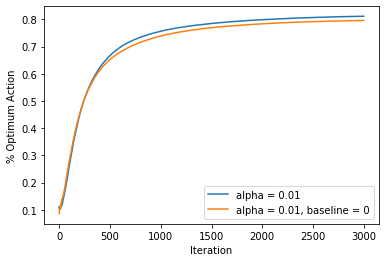

In [30]:
plt.plot(Bestaction_history_1/200, label = "alpha = 0.01")

plt.plot(Bestaction_history_4/200, label = "alpha = 0.01, baseline = 0")

plt.xlabel('Iteration')
plt.ylabel('% Optimum Action')
#plt.title('Average Mean_Rewards-Iteration history in 400 * 2000-rounds')
plt.legend()
plt.show()

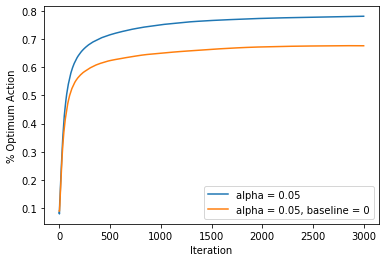

In [31]:

plt.plot(Bestaction_history_2/200, label = "alpha = 0.05")

plt.plot(Bestaction_history_5/200, label = "alpha = 0.05, baseline = 0")

plt.xlabel('Iteration')
plt.ylabel('% Optimum Action')
#plt.title('Average Mean_Rewards-Iteration history in 400 * 2000-rounds')
plt.legend()
plt.show()

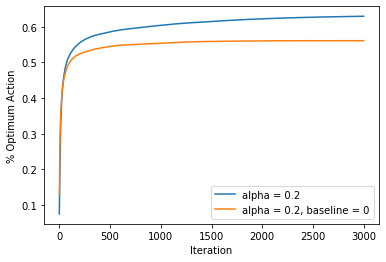

In [32]:

plt.plot(Bestaction_history_3/200, label = "alpha = 0.2")

plt.plot(Bestaction_history_6/200, label = "alpha = 0.2, baseline = 0")

plt.xlabel('Iteration')
plt.ylabel('% Optimum Action')
#plt.title('Average Mean_Rewards-Iteration history in 400 * 2000-rounds')
plt.legend()
plt.show()